# Data Mining Homework-3 Task 2

In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162735 sha256=58ab81f6aaf282420570c7652c34a5f0587bf1b82a1f7846b4e827de4ca4b947
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
from surprise import SVD, KNNBasic
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report

## 3(a) Read data from “ratings small.csv” with line format: 'userID movieID rating timestamp'.

In [3]:
# Read dataset ratings_small.csv

data = pd.read_csv('ratings_small.csv')
data.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# drop timestamp

data = data.drop('timestamp', axis=1)

In [5]:
data.head(5)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [6]:
reader = Reader(rating_scale=(min(data['rating']), max(data['rating'])))
ratings_surprise = Dataset.load_from_df(data, reader)

## 3(c) Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation (10 points)

### Probabilistic Matrix Factorization(PMF)

In [8]:
model_pmf = SVD()
model_pmf_cv = cross_validate(model_pmf, ratings_surprise, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8898  0.9041  0.9008  0.8990  0.8879  0.8963  0.0063  
MAE (testset)     0.6876  0.6960  0.6947  0.6925  0.6823  0.6906  0.0051  
Fit time          1.56    1.50    1.82    2.48    2.62    1.99    0.47    
Test time         0.15    0.31    0.20    0.43    0.23    0.26    0.10    


In [9]:
avg_pmf_rmse = np.average(model_pmf_cv['test_rmse'])
avg_pmf_mae = np.average(model_pmf_cv['test_mae'])
print('Average of RMSE for Probabilistic Matrix Factorization(PMF) = ', avg_pmf_rmse)
print('Average of MAE for Probabilistic Matrix Factorization(PMF) = ', avg_pmf_mae)

Average of RMSE for Probabilistic Matrix Factorization(PMF) =  0.8963287191861606
Average of MAE for Probabilistic Matrix Factorization(PMF) =  0.690619826799568


### User-based collaborative filtering (UCF)

In [10]:
sim_options = {'name': 'cosine', 'user_based': True}
user_cf = KNNBasic(sim_options=sim_options)
user_cf_cv = cross_validate(user_cf, ratings_surprise, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9904  0.9997  0.9957  0.9918  0.9962  0.9948  0.0033  
MAE (testset)     0.7644  0.7733  0.7690  0.7663  0.7702  0.7686  0.0031  
Fit time          0.34    0.44    0.44    0.22    0.21    0.33    0.10    
Test time         2.76    2.59    2.48    1.45    1.60    2.18    0.54    


In [11]:
avg_user_cf_rmse = np.average(user_cf_cv['test_rmse'])
avg_user_cf_mae = np.average(user_cf_cv['test_mae'])
text_1 = f"Average of RMSE for User-based collaborative filtering (UCF) = {avg_user_cf_rmse}<br>Average of MAE for User-based collaborative filtering (UCF) = {avg_user_cf_mae}<br>"

display(Markdown(text_1))

Average of RMSE for User-based collaborative filtering (UCF) = 0.9947601468945187<br>Average of MAE for User-based collaborative filtering (UCF) = 0.768646986460368<br>

## Item-based collaborative filtering (ICF)

In [12]:
sim_options = {'name': 'cosine', 'user_based': False}
item_cf = KNNBasic(sim_options=sim_options)
item_cf_cv = cross_validate(item_cf, ratings_surprise, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9914  0.9871  1.0004  0.9965  0.9973  0.9945  0.0047  
MAE (testset)     0.7715  0.7667  0.7768  0.7781  0.7760  0.7738  0.0042  
Fit time          10.57   12.98   7.69    9.22    9.16    9.92    1.78    
Test time         12.39   9.88    7.72    7.21    8.16    9.07    1.89    


In [13]:
avg_item_cf_rmse = np.average(item_cf_cv['test_rmse'])
avg_item_cf_mae = np.average(item_cf_cv['test_mae'])
print('Average of RMSE for Item-based collaborative filtering (ICF) =', avg_item_cf_rmse)
print('Average of MAE for Item-based collaborative filtering (ICF) =', avg_item_cf_mae)

Average of RMSE for Item-based collaborative filtering (ICF) = 0.9945308927041208
Average of MAE for Item-based collaborative filtering (ICF) = 0.7738455866167424


### 3(d) Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data? (10 points

In [14]:
text = f"""|Algo|Mean RMSE|Mean MAE|
|----|---------|--------|
|Probability Matrix Factorization|{avg_pmf_rmse}|{avg_pmf_mae}|
|User-based collaborative filtering|{avg_user_cf_rmse}|{avg_user_cf_mae}|
|Item-based collaborative filtering|{avg_item_cf_rmse}|{avg_item_cf_mae}|"""
display(Markdown(text))

|Algo|Mean RMSE|Mean MAE|
|----|---------|--------|
|Probability Matrix Factorization|0.8963287191861606|0.690619826799568|
|User-based collaborative filtering|0.9947601468945187|0.768646986460368|
|Item-based collaborative filtering|0.9945308927041208|0.7738455866167424|

Based on the table above, it can be observed that User-based collaborative filtering and Item-based collaborative filtering are fairly similar in the metrics performance.

Numerically, it can be seen that Item-based collaborative filtering slightly pulls ahead and can be considered the better model for movie rating data for both RMSE and MAE

### 3(e) Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering? (10 points)

In [15]:
# Item-based collaborative filtering

sim_options_cosine = {
    "name": 'cosine',
    'user_based': False
}

sim_options_msd = {
    "name": 'msd',
    'user_based': False
}

sim_options_pearson = {
    "name": 'pearson',
    'user_based': False
}

In [16]:
item_cf_cosine = KNNBasic(sim_options=sim_options_cosine)
item_cf_cosine_cv = cross_validate(algo=item_cf_cosine, data=ratings_surprise, measures=['RMSE'], cv=5, verbose=True)

item_cf_msd = KNNBasic(sim_options=sim_options_msd)
item_cf_msd_cv = cross_validate(algo=item_cf_msd, data=ratings_surprise, measures=['RMSE'], cv=5, verbose=True)

item_cf_pearson = KNNBasic(sim_options=sim_options_pearson)
item_cf_pearson_cv = cross_validate(algo=item_cf_pearson, data=ratings_surprise, measures=['RMSE'], cv=5, verbose=True)

avg_item_cf_cosine_cv = np.average(item_cf_cosine_cv['test_rmse'])
avg_item_cf_msd_cv = np.average(item_cf_msd_cv['test_rmse'])
avg_item_cf_pearson_cv = np.average(item_cf_pearson_cv['test_rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9977  0.9936  0.9914  0.9955  0.9996  0.9955  0.0029  
Fit time          7.22    6.51    6.68    6.63    6.67    6.74    0.24    
Test time         10.07   11.75   11.67   11.17   9.68    10.87   0.84    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done com

In [17]:
# User-based collaborative filtering

sim_options_cosine = {
    "name": 'cosine',
    'user_based': True
}

sim_options_msd = {
    "name": 'msd',
    'user_based': True
}

sim_options_pearson = {
    "name": 'pearson',
    'user_based': True
}

In [18]:
user_cf_cosine = KNNBasic(sim_options=sim_options_cosine)
user_cf_cosine_cv = cross_validate(algo=user_cf_cosine, data=ratings_surprise, measures=['RMSE'], cv=5, verbose=True)

user_cf_msd = KNNBasic(sim_options=sim_options_msd)
user_cf_msd_cv = cross_validate(algo=user_cf_msd, data=ratings_surprise, measures=['RMSE'], cv=5, verbose=True)

user_cf_pearson = KNNBasic(sim_options=sim_options_pearson)
user_cf_pearson_cv = cross_validate(algo=user_cf_pearson, data=ratings_surprise, measures=['RMSE'], cv=5, verbose=True)

avg_user_cf_cosine_cv = np.average(user_cf_cosine_cv['test_rmse'])
avg_user_cf_msd_cv = np.average(user_cf_msd_cv['test_rmse'])
avg_user_cf_pearson_cv = np.average(user_cf_pearson_cv['test_rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9975  0.9977  0.9965  0.9821  0.9960  0.9940  0.0059  
Fit time          0.23    0.26    0.24    0.37    0.42    0.30    0.08    
Test time         1.52    1.72    1.52    2.58    2.98    2.06    0.60    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done com

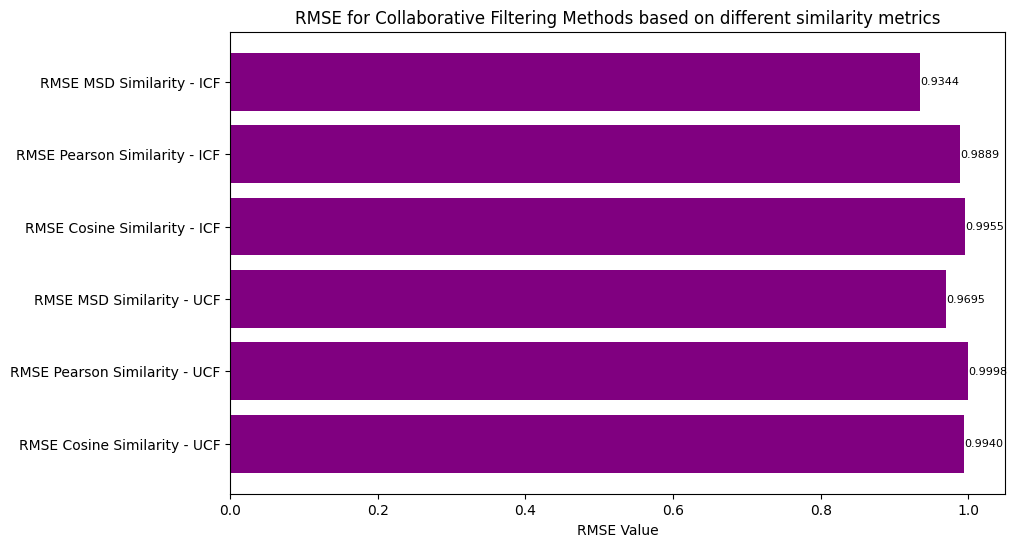

In [19]:
final_plot = {
    'RMSE Cosine Similarity - UCF': avg_user_cf_cosine_cv,
    'RMSE Pearson Similarity - UCF': avg_user_cf_pearson_cv,
    'RMSE MSD Similarity - UCF': avg_user_cf_msd_cv,
    'RMSE Cosine Similarity - ICF': avg_item_cf_cosine_cv,
    'RMSE Pearson Similarity - ICF': avg_item_cf_pearson_cv,
    'RMSE MSD Similarity - ICF': avg_item_cf_msd_cv
}

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(
    list(final_plot.keys()), list(final_plot.values()),
    color='purple',
    label=list(final_plot.values())
)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}',
             va='center', ha='left', fontsize=8, color='black')

ax.set_xlabel('RMSE Value')
ax.set_title('RMSE for Collaborative Filtering Methods based on different similarity metrics')
plt.show()

In [20]:
text = ""
text += f"It can be observed that Item CF ({avg_item_cf_msd_cv}) achieves **lower RMSE**"
text += f" Accuracy than User CF ({avg_user_cf_msd_cv}) for **MSD similarity measure**,\n **lower RMSE** Accuracy({avg_item_cf_pearson_cv})"
text += f" than User CF ({avg_user_cf_pearson_cv}) for **Pearson similarity measure** and\n **higher RMSE** Accuracy({avg_item_cf_cosine_cv})"
text += f" than User CF({avg_user_cf_cosine_cv}) for **Cosine similarity measure**."

display(Markdown(text))

It can be observed that Item CF (0.9343820130508735) achieves **lower RMSE** Accuracy than User CF (0.9695350934907175) for **MSD similarity measure**,
 **lower RMSE** Accuracy(0.9889273570782109) than User CF (0.9998298275772457) for **Pearson similarity measure** and
 **higher RMSE** Accuracy(0.9955470729625304) than User CF(0.993977897875933) for **Cosine similarity measure**.

It can be observed that the difference is not significant for Pearson and Cosine. Numerically, the impact of the 3 metrics is not significantly consistent between User-based collaborative filtering and Item-based collaborative filtering.

### 3(f) Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results.

In [27]:
k_values = np.arange(5, 41, 5)

def evaluate_rmse_for_different_k(model: KNNBasic, data: any):
    cv_results = cross_validate(model, data, measures=['RMSE'], cv=5)
    return np.average(cv_results['test_rmse'])

sim_options_icf = {
    "name": 'cosine',
    "user_based": False
}

sim_options_ucf = {
    "name": 'cosine',
    'user_based': True
}

results = {}
for k_val in k_values:
    model_icf = KNNBasic(k=k_val, sim_options=sim_options_icf)
    model_ucf = KNNBasic(k=k_val, sim_options=sim_options_ucf)

    acc_icf_rmse = evaluate_rmse_for_different_k(model=model_icf, data=ratings_surprise)
    acc_ucf_rmse = evaluate_rmse_for_different_k(model=model_ucf, data=ratings_surprise)
    results[k_val] = (acc_icf_rmse, acc_ucf_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

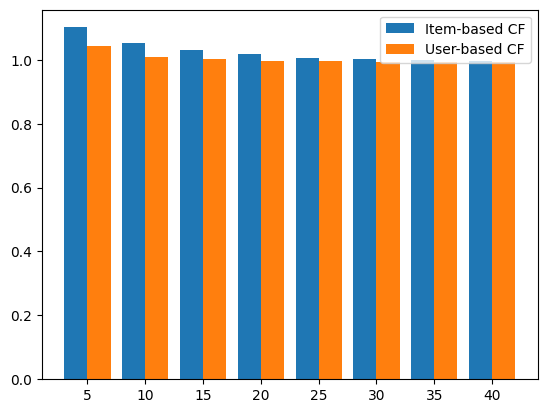

{5: (1.101810617673237, 1.0433016831501785), 10: (1.051628786560279, 1.0100192629734444), 15: (1.0321280522509622, 1.0013240191778927), 20: (1.017070531767264, 0.9968730278133414), 25: (1.0070171384372681, 0.9954095981822852), 30: (1.0040266633340669, 0.9937707501345315), 35: (0.9980252109285388, 0.9944885603306914), 40: (0.995348950822431, 0.9940425331800338)}


In [28]:
fig, ax = plt.subplots()
X = list(results.keys())
X_axis = np.arange(len(X))
bar1 = ax.bar(X_axis - 0.2, [x[0] for x in results.values()], width = 0.4, label='Item-based CF')
bar2 = ax.bar(X_axis + 0.2, [x[1] for x in results.values()], width = 0.4, label='User-based CF')

ax.set_xticks(X_axis, X)
ax.legend()
plt.show()
print(results)

It is observed that there exists consistent accuracy gap between Item-based Collaborative Filtering-ICF and User-based Collaborative Filtering-UCF, with ICF consistently outperforming UCF. The number of neighbors does not appear to significantly impact the consistency of the performance. However, it can be noticed that the RMSE accuracy keeps reducing with increasing K values.

### 3(g) Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering? (10 points)

In [29]:
k_for_min_ucf_rmse = min(results, key=lambda x : results[x][1])
k_for_min_icf_rmse = min(results, key=lambda x : results[x][0])
text = ""
text += f"K = {k_for_min_icf_rmse} has the lowest RMSE and therefore, is the best number of neighbors for Item-based collaborative filtering.\n"
text += f" K = {k_for_min_ucf_rmse} is the lowest RMSE and therefore, the best number of neighbors for User-based collaborative filtering."
display(Markdown(text))

K = 40 has the lowest RMSE and therefore, is the best number of neighbors for Item-based collaborative filtering.
 K = 30 is the lowest RMSE and therefore, the best number of neighbors for User-based collaborative filtering.

No, the best K of User based collaborative filtering is not the same with the best K of Item based collaborative filtering.